In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [2]:
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)
# https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side

In [3]:
pd.set_option('display.max_rows',1000)

### General functions

In [4]:
def df_frag(column, value):
    return data[data[column] == value]

In [5]:
def get_nulls(df):
    return df[df['imdb_rating'].isnull()].shape

In [6]:
def drop_column(df,column):
    return df.drop(column, axis=1, inplcae = True)

### General Analysis

In [28]:
#data = pd.read_csv('data\\notebook_df\\final_data.csv')

In [25]:
data = pd.read_csv('data\\notebook_df\\streaming_platforms_data.csv')

In [26]:
data = data[~data.imdb_rating.isnull()]

In [27]:
data.shape

(15754, 14)

In [28]:
data.dtypes

show_id          object
type             object
title            object
director         object
cast             object
country          object
date_added       object
release_year      int64
rating           object
duration         object
listed_in        object
description      object
platform         object
imdb_rating     float64
dtype: object

#### I want to change the name of two columns to a more easy to understand one

In [39]:
data.rename(columns={'rating':'PG',
                     'title':'name',
                     'listed_in':'genres'}, inplace = True)

In [40]:
data.columns

Index(['type', 'name', 'country', 'date_added', 'release_year', 'PG',
       'duration', 'genres', 'platform', 'imdb_rating'],
      dtype='object')

We need to change the format of imdb_rating to float

In [81]:
# The rating extrcated from IMdb came wiht a ",", so before changing its type to float we need to replace it by "."
data.imdb_rating = data.imdb_rating.replace(',','.',regex = True)
data = data.astype({'imdb_rating':'float64'})

In [82]:
data = data.astype({'imdb_rating':'float64'})

In [31]:
# Lets round the rating to 1 decimal number 
data = data.round({'imdb_rating':1})

In [114]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'platform', 'imdb_rating'],
      dtype='object')

### Drop irrelevant columns

In [36]:
data = data.drop(['show_id', 'director', 'cast', 'description'], axis = 1)

In [135]:
data.to_csv(r'C:\Users\juanp\proyectos_varios\streaming_platforms\data\notebook_df\platforms_data_22_04.csv' , index = False)

In [54]:
data = data[(data.imdb_rating > 1) & (data.imdb_rating < 10)]

## Divisions and Analysis

### General Analysis

In [56]:
data.imdb_rating.describe()

count    15751.000000
mean         6.338652
std          1.274798
min          1.100000
25%          5.600000
50%          6.500000
75%          7.200000
max          9.900000
Name: imdb_rating, dtype: float64

In [57]:
data[data.imdb_rating == 9.9]

,type,name,country,date_added,release_year,PG,duration,genres,platform,imdb_rating
14281,Movie,Yatra (Telugu),NaN,NaN,2019,ALL,126 min,"Drama, International",amazon,9.9


In [59]:
data[data.imdb_rating == 1.1]

,type,name,country,date_added,release_year,PG,duration,genres,platform,imdb_rating
11079,Movie,Finding Jesus,NaN,NaN,2020,ALL,69 min,"Faith and Spirituality, Kids, Special Interest",amazon,1.1
17777,Movie,Hell At My Heels,NaN,NaN,2012,PG,76 min,Western,amazon,1.1


In [63]:
good_quality = data[data.imdb_rating > 7.2]

In [65]:
good_quality.platform.value_counts()

netflix    1886
amazon     1718
disney      313
Name: platform, dtype: int64

In [74]:
good_quality.groupby('platform').agg({'imdb_rating':'mean'})

,imdb_rating
platform,
amazon,7.858382
disney,7.787540
netflix,7.789396


In [77]:
s = good_quality.sort_values(by='imdb_rating', ascending=False)

In [79]:
s_ = list(s['name'])

In [85]:
s.head(50)

,type,name,country,date_added,release_year,PG,duration,genres,platform,imdb_rating
14281,Movie,Yatra (Telugu),NaN,NaN,2019,ALL,126 min,"Drama, International",amazon,9.9
12872,TV Show,JARRETTS,NaN,NaN,2021,16+,1 Season,TV Shows,amazon,9.8
2557,TV Show,Scissor Seven,China,"May 7, 2020",2020,TV-MA,2 Seasons,"International TV Shows, TV Action & Adventure,...",netflix,9.7
12032,Movie,Deva Rickshawala,NaN,NaN,2021,16+,127 min,"Drama, Romance",amazon,9.7
18469,Movie,Anaganaga Oka Nenu,NaN,NaN,2021,18+,135 min,"Action, Drama, Suspense",amazon,9.7
11406,Movie,Mitzi... Zings into Spring,NaN,NaN,1977,16+,51 min,"Arts, Entertainment, and Culture",amazon,9.6
18080,TV Show,Act 5 - Series 2,NaN,NaN,2021,ALL,1 Season,TV Shows,amazon,9.6
18081,TV Show,Act 5 - Series 1,NaN,"September 17, 2021",2021,ALL,3 Seasons,Action,amazon,9.6
7747,TV Show,Planet Earth II,United Kingdom,"December 25, 2017",2016,TV-G,1 Season,"British TV Shows, Docuseries, Science & Nature TV",netflix,9.5
16208,Movie,Standing Eight,NaN,NaN,2019,16+,27 min,Drama,amazon,9.5


In [81]:
s_

['Yatra (Telugu)',
 'JARRETTS',
 'Scissor Seven',
 'Deva Rickshawala',
 'Anaganaga Oka Nenu',
 'Mitzi... Zings into Spring',
 'Act 5 - Series 2',
 'Act 5 - Series 1',
 'Planet Earth II',
 'Standing Eight',
 'Couple of Mirrors',
 'Starting Up',
 'Hospital Playlist',
 'Take Us Home: Leeds United',
 'Prayer Never Fails',
 'Niko and the Sword of Light',
 'Subaru Launch Control',
 'Restoration, Inc.',
 'Babe Ruth Story',
 'A Promise to My Father',
 'The Prisoner',
 'Our Planet',
 'Strictly For The Streets Vol. 1',
 'Gho Gho Rani',
 'Aham Bhramhasmi',
 'Prem Gajra Chilli Chicken',
 'Blue Planet II',
 'Pazhagiya Naatkal',
 'The Tell Tale Heart',
 'Avatar: The Last Airbender',
 'Harmony with A R Rahman',
 'Because I Love You',
 'Scaredy Squirrel',
 'Surgeons: At the Edge of Life',
 'Anne with an E',
 'The Sinner',
 'Reply 1988',
 'The Dragon Prince',
 'Dragons: Race to the Edge',
 'The 12th Man',
 'LoliRock',
 'The Great British Baking Show: Holidays',
 'Cosmos: Possible Worlds',
 'Homeless He

### Division between Series and Movies

In [43]:
data.imdb_rating.mean()

6.338777453345182

In [32]:
movies = df_frag('type', 'Movie')

In [33]:
movies.shape

(12418, 14)

In [34]:
tv_shows = df_frag('type', 'TV Show')

In [35]:
tv_shows.shape

(3336, 14)

### Division bewteen streaming platforms

#### Netflix

In [36]:
netflix = df_frag('platform', 'netflix')

In [37]:
netflix.shape

(6958, 14)

#### Amazon

In [38]:
amazon = df_frag('platform', 'amazon')

In [39]:
amazon.shape

(7685, 14)

In [40]:
amazon_nulls = pd.read_csv('data\\notebook_df\\amazon_null.csv')

In [41]:
amazon_f = pd.concat([amazon, amazon_nulls])

In [42]:
amazon = amazon_f.drop_duplicates(subset='title', keep='last')

#### Disney

In [43]:
disney = df_frag('platform', 'disney')

In [44]:
disney.shape

(1111, 14)

In [45]:
get_nulls(disney)

(0, 14)

### Further differentiation

In [46]:
data = pd.read_csv('data\\notebook_df\\platforms_data_22_04.csv')

In [47]:
data.rename(columns = {},inplace=True)

In [48]:
data.genres = data.genres.replace(to_replace = 'TV', value = '', regex=True)

In [49]:
data.genres = data.genres.replace(to_replace = 'Movies', value = '', regex=True)

In [50]:
data.genres = data.genres.replace(to_replace = 'Shows', value = '', regex=True)

In [51]:
data.genres = data.genres.replace(to_replace = 'Series', value = '', regex=True)

In [52]:
data.genres = data.genres.replace(to_replace = 'Features', value = '', regex=True)

#### Year

In [51]:
year_list = list(data.release_year.unique())

#### I want to separate all unique values of listed_in and countries

In [218]:
def extract_uniques(lista):

    unique_values = []

    for number in range(0,len(lista)):
        try:
            words = lista[number].split(',')
        except:
            pass
        for word in words:
            if word.strip() not in unique_values:
                unique_values.append(word.strip())
    return unique_values

In [249]:
def complete_list(lista):

    total_values = []
    
    for number in range(0,len(lista)):
        try:
            words = lista[number].split(',')
        except:
            pass
        for word in words:
            total_values.append(word.strip())
    return total_values        

In [402]:
x = list(zip(data.genres, data.imdb_rating))

In [436]:
x_2 =  x[0:100]

In [456]:
lista_1 = []
lista_2 = []


for number in range(0,len(x_2)):
    try:
        words = x_2[number][0].split(',')
    except:
        pass

    for word in words:

        lista_1.append(word.strip())
        lista_2.append(x_2[number][1])

        result = pd.DataFrame()
        result[1] = lista_1
        result[2]= lista_2

In [455]:
x_2[0][0].split(',')

['International', 'Dramas', ' Teen']

In [458]:
def columns_rating(column_1, column_2):
    
    df = list(zip(column_1, column_2))

    lista_1 = []
    lista_2 = []


    for number in range(0,len(df)):
        try:
            words = df[number][0].split(',')
        except:
            pass
        
        for word in words:
            
            lista_1.append(word.strip())
            lista_2.append(df[number][1])
            
            result = pd.DataFrame()
            result[1] = lista_1
            result[2]= lista_2
            
    return result


#### Genres

In [459]:
complete_genres = columns_rating(data.genres, data.imdb_rating)

In [461]:
len(complete_genres)

33135

In [462]:
complete_genres.rename(columns = {1:'genre',2:'rating'}, inplace=True)

#### Modifications to have better data 

In [505]:
complete_genres['genre'] = complete_genres['genre'].replace('Action-Adventure', 'Action & Adventure', regex=True)

In [507]:
complete_genres['genre'] = complete_genres['genre'].replace('Classic', 'Classic & Cult', regex=True)

In [509]:
complete_genres['genre'] = complete_genres['genre'].replace('Documentaries', 'Documentary', regex=True)

In [510]:
complete_genres['genre'] = complete_genres['genre'].replace('Dramas', 'Drama', regex=True)

In [512]:
complete_genres['genre'] = complete_genres['genre'].replace('Faith and Spirituality', 'Faith & Spirituality', regex=True)

In [518]:
complete_genres['genre'] = complete_genres['genre'].replace("Kids'", 'Kids', regex=True)

In [520]:
complete_genres['genre'] = complete_genres['genre'].replace('Dance', 'Music & Musicals', regex=True)

In [521]:
complete_genres['genre'] = complete_genres['genre'].replace('Concert Film', 'Music & Musicals', regex=True)

In [522]:
complete_genres['genre'] = complete_genres['genre'].replace('Musical', 'Music & Musicals', regex=True)

In [532]:
complete_genres['genre'] = complete_genres['genre'].replace('Mysteries', 'Mystery', regex=True)

In [534]:
complete_genres['genre'] = complete_genres['genre'].replace('Romantic', 'Romance', regex=True)

In [538]:
complete_genres['genre'] = complete_genres['genre'].replace('Science Fiction', 'Sci-Fi & Fantasy', regex=True)

In [540]:
complete_genres['genre'] = complete_genres['genre'].replace('Spy/Espionage', 'Espionage', regex=True)

In [542]:
complete_genres['genre'] = complete_genres['genre'].replace('Stand-Up Comedy & Talk', 'Stand-Up Comedy', regex=True)

In [555]:
complete_genres['genre'] = complete_genres['genre'].replace('Talk Show and Talk Show and Variety',
                                                            'Talk Show and Variety', regex=True)

In [550]:
complete_genres['genre'] = complete_genres['genre'].replace('Variety', 'Talk Show and Variety', regex=True)

In [548]:
complete_genres['genre'] = complete_genres['genre'].replace('Thrillers', 'Thriller', regex=True)

In [552]:
complete_genres['genre'] = complete_genres['genre'].replace('Soap Opera / Melodrama', 'Soap Opera', regex=True)

There are a series of genres that are not really genres and we can delete. These are: Young Adult Audience, and Culture, Korean Spanish Language. I'm going to keep the international genre becuase it can refer to movies than involve global issues, but if this is not the case, I will drop it too.

In [594]:
complete_genres_clean = complete_genres[(complete_genres['genre'] != 'and Culture') & (complete_genres['genre'] != 'Young Adult Audience') &
                   (complete_genres['genre'] != 'Korean') & (complete_genres['genre'] != 'Spanish-Language') & 
                   (complete_genres['genre'] != '')]

In [618]:
top_genres = complete_genres_clean.groupby('genre').agg({
    'rating':'mean'}).sort_values(by='rating', ascending=False).head(10)

In [619]:
bottom_genres = complete_genres_clean.groupby('genre').agg({
    'rating':'mean'}).sort_values(by='rating', ascending=False).tail(10)

In [621]:
display_side_by_side(top_genres,bottom_genres, titles=['top_10_genres', 'bottom_10_genres'])

,rating
genre,
Medical,7.933333
Fitness,7.650000
Survival,7.642857
Travel,7.600000
Classic & Cult & Cult,7.533333
Classic & Cult,7.390566
Docuseries,7.364691
Teen,7.304348
Science & Nature,7.301471


#### Countries

In [733]:
countries_com = data[data.country.isin(v.index[v.gt(1)])]

In [734]:
countries_com = countries_com[~countries_com.country.isnull()]

In [735]:
countries_com = countries_com[~countries_com.country.str.contains(',')]

In [736]:
countries_list = list(countries_com.country.unique())
# Apart from individual countries there are titlesthat have a combination of countries 

In [746]:
complete_countries = columns_rating(countries_com.country, countries_com.imdb_rating)

In [747]:
len(complete_countries)

6797

In [748]:
complete_countries.rename(columns={1:'country', 2:'rating'},inplace=True)

In [749]:
complete_countries = complete_countries[complete_countries != '']

In [750]:
top_countries = complete_countries.groupby('country').agg({
    'rating':'mean'}).sort_values(by='rating', ascending=False).head(10)

In [751]:
bottom_countries = complete_countries.groupby('country').agg({
    'rating':'mean'}).sort_values(by='rating', ascending=False).tail(10)

In [752]:
display_side_by_side(top_countries,bottom_countries, titles=['top_10_countries', 'bottom_10_countries'])

,rating
country,
South Korea,7.216463
Israel,7.188889
Japan,7.127638
Belgium,7.042857
Iceland,7.040000
Denmark,7.037500
China,6.954237
Pakistan,6.940000
Lebanon,6.921429


### Analysis

In [60]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,platform,imdb_rating
2,s278,TV Show,AlRawabi School for Girls,NaN,"Andria Tayeh, Rakeen Sa'ad, Noor Taher, Yara M...",Jordan,"August 12, 2021",2021,TV-14,1 Season,"International TV Shows, TV Dramas, Teen TV Shows",The bullied outcasts at prestigious Al Rawabi ...,netflix,7.4
3,s279,Movie,Lokillo: Nothing's the Same,Julián Gaviria,Lokillo Florez,Colombia,"August 12, 2021",2021,TV-MA,64 min,Stand-Up Comedy,"Through songs and puns, comedian Lokillo Flore...",netflix,4.6
4,s280,Movie,Monster Hunter: Legends of the Guild,Steven Yamamoto,"Ben Rausch, Erica Lindbeck, Dante Basco, Brand...","United States, Japan","August 12, 2021",2021,TV-PG,59 min,"Action & Adventure, Anime Features, Children &...",In a world where humans and fearsome monsters ...,netflix,5.2
5,s281,TV Show,Bake Squad,NaN,NaN,United States,"August 11, 2021",2021,TV-PG,1 Season,Reality TV,Expert bakers elevate desserts with next-level...,netflix,7.0
7,s283,Movie,La diosa del asfalto,Julián Hernández,"Ximena Romo, Mabel Cadena, Alejandra Herrera, ...",Mexico,"August 11, 2021",2020,TV-MA,127 min,"Dramas, Independent Movies, International Movies",A woman from a tough neighborhood outside Mexi...,netflix,5.0


In [48]:
data.dtypes

show_id          object
type             object
title            object
director         object
cast             object
country          object
date_added       object
release_year      int64
rating           object
duration         object
listed_in        object
description      object
platform         object
imdb_rating     float64
dtype: object

#### Data count

In [49]:
data.type.value_counts()

Movie      12418
TV Show     3336
Name: type, dtype: int64

### Platform quality

In [52]:
data.groupby('platform').agg({'imdb_rating':
                                    'mean'}).sort_values('imdb_rating', ascending = False)

,imdb_rating
platform,
disney,6.641494
netflix,6.465536
amazon,6.180247


### Platform quality 

In [53]:
data[data.type=='TV Show'].groupby('platform').agg({'imdb_rating':
                                                                'mean'}).sort_values('imdb_rating', ascending = False)

,imdb_rating
platform,
disney,7.073504
amazon,7.058696
netflix,7.057549


In [54]:
data[data.type=='Movie'].groupby('platform').agg({'imdb_rating':
                                                              'mean'}).sort_values('imdb_rating', ascending = False)

,imdb_rating
platform,
disney,6.526226
netflix,6.270837
amazon,5.987978


### What platform has the best title

In [55]:
top_100_movies = data[data.type == 'Movie'].sort_values('imdb_rating', ascending = False).head(100)

In [254]:
len(complete_countries)

19634

In [56]:
top_100_shows = data[data.type == 'TV Show'].sort_values('imdb_rating', ascending = False).head(100)

In [57]:
top_100_movies.groupby('platform').agg({'title':'count', 'imdb_rating':'mean'})

,title,imdb_rating
platform,,
amazon,71,8.969014
disney,6,8.816667
netflix,23,8.839130


In [58]:
top_100_shows.groupby('platform').agg({'title':'count', 'imdb_rating':'mean'})

,title,imdb_rating
platform,,
amazon,42,9.085714
disney,5,8.980000
netflix,53,9.047170


### Differentiation for analysis

In [59]:
amazon_t = data[(data.platform == 'amazon')]

In [60]:
amazon_movie_len = len(amazon_t[amazon_t.type == 'Movie'])

In [61]:
amazon_show_len = len(amazon_t[amazon_t.type == 'TV Show'])

In [62]:
netflix_t = data[(data.platform == 'netflix')]

In [63]:
netflix_movie_len = len(netflix_t[netflix_t.type == 'Movie'])

In [64]:
netflix_show_len = len(netflix_t[netflix_t.type == 'TV Show'])

In [65]:
disney_t = data[(data.platform == 'disney')]

In [66]:
disney_movie_len = len(disney_t[disney_t.type == 'Movie'])

In [67]:
disney_show_len = len(disney_t[disney_t.type == 'TV Show'])

### Function for creating the final table

In [68]:
def quantile_results(df, title_type, len_df):
    movies_1q = df[(df.type == title_type) & (df.imdb_rating >= 7.5)].groupby('platform').agg({
    'title':lambda series: (series).count()/len_df * 100})
    movies_2q = df[(df.type == title_type) & (df.imdb_rating < 7.5) 
                       & (df.imdb_rating >= 5.0)].groupby('platform').agg({'title':lambda series: (series).count()/len_df * 100})
    movies_3q = df[(df.type == title_type) & (df.imdb_rating < 5.0)].groupby('platform').agg({
        'title':lambda series: (series).count()/len_df * 100})
    '''movies_4q = df[(df.type == title_type) & (df.imdb_rating <= 2.5)].groupby('platform').agg({
    'title':lambda series: (series).count()/len_df * 100})
    '''
    
    movies_q_complete = movies_1q.join(movies_2q, lsuffix='_1q', rsuffix='_2q').join(
    movies_3q, lsuffix= '_2q',rsuffix='_3q')
    
    return movies_q_complete
    

In [32]:
amazon_movie_q  = quantile_results(amazon_t, 'Movie', amazon_movie_len)
netflix_movie_q = quantile_results(netflix_t, 'Movie', netflix_movie_len)
disney_movie_q = quantile_results(disney_t, 'Movie', disney_movie_len)
data_movie_1 = quantle_results(data[data.type == 'Movie'], len(data[data.type=='Movie']))

NameError: name 'quantile_results' is not defined

In [70]:
amazon_show_q  = quantile_results(amazon_t, 'TV Show', amazon_show_len)
netflix_show_q = quantile_results(netflix_t, 'TV Show', netflix_show_len)
disney_show_q = quantile_results(disney_t, 'TV Show', disney_show_len)

In [71]:
movies_q = pd.concat([amazon_movie_q, netflix_movie_q, disney_movie_q]).round(decimals=2).rename(columns = {
    'title_1q':'1Q','title_2q':'2Q','title':'3Q'})

In [39]:
movies_q #último resultado -> no borrar hasta que no asegurar que obtenemos lo mismo

,1Q,2Q,3Q
platform,,,
amazon,12.16,67.79,20.05
netflix,14.04,73.28,12.68
disney,15.17,78.68,6.16


In [73]:
shows_q = pd.concat([amazon_show_q, netflix_show_q, disney_show_q]).round(decimals=2).rename(columns = {
    'title_1q':'1Q','title_2q':'2Q','title':'3Q'})

In [74]:
shows_q

,1Q,2Q,3Q
platform,,,
amazon,40.29,53.99,5.72
netflix,38.04,58.07,3.89
disney,41.88,54.70,3.42


### Yearly Analysis - Evolution of each platform

In [83]:
data.dtypes

show_id          object
type             object
title            object
director         object
cast             object
country          object
date_added       object
release_year      int64
rating           object
duration         object
listed_in        object
description      object
platform         object
imdb_rating     float64
dtype: object

In [84]:
ama_list = list(amazon.release_year.unique())

In [85]:
net_list = list(netflix.release_year.unique())

In [86]:
dis_list = list(disney.release_year.unique())

In [92]:
amazon_annual = amazon_t.groupby('release_year').agg({'imdb_rating':'mean'})
amazon_annual['platform'] = 'amazon'

In [93]:
netflix_annual = netflix_t.groupby('release_year').agg({'imdb_rating':'mean'})
netflix_annual['platform'] = 'netflix'

In [94]:
disney_annual = disney_t.groupby('release_year').agg({'imdb_rating':'mean'})
disney_annual['platform'] = 'disney'

In [95]:
annual_data = pd.concat([amazon_annual, netflix_annual, disney_annual])

In [96]:
annual_data_pvt = annual_data.pivot_table(annual_data, 'release_year', 'platform')

In [97]:
annual_data_pvt.fillna(annual_data_pvt.mean(), inplace = True)

In [98]:
plotting_data = annual_data_pvt.imdb_rating

In [99]:
plotting_data.reset_index(level=0, inplace=True)

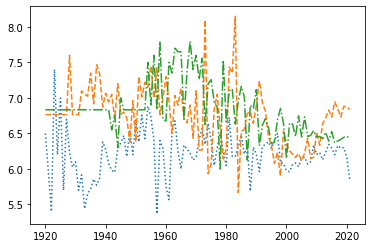

In [101]:
plt.plot(plotting_data.release_year, plotting_data.amazon, label = 'amazon', linestyle = ':')
plt.plot(plotting_data.release_year, plotting_data.disney, label = 'disney', linestyle='--')
plt.plot(plotting_data.release_year, plotting_data.netflix, label = 'netflix', linestyle = 'dashdot')